# Data Visalization with seaborn

In [352]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

This notebook has been built following seaborn's documentation. Keep it close as you begin your Seaborn journey:

* [Official seaborn tutorial page](https://seaborn.pydata.org/tutorial.html)

* [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)

In this notebook we are going to look at seaborn's figure-level functions, as opposed to their axes-level functions. There are intrinsic differences between these two types of functions, but what you need to know is:
* Figure level: three basic functions to be used depending on what kind of data are you plotting e.g. `.catplot()` for categorical data
* Axes-level: many functions, one for each specific type of plot e.g `.barplot()`, `.histplot()`, etc.

Seaborn recommends using figure-level plots for most applications as they produce "slightly cleaner plots". Axes-level plots should only be used when you need to produce "complex, standalone figures that compose multiple different plot kinds".

There are 3 different types of figure-level plots in seaborn
* `.catplot()` - for categorical plots (discrete data)
* `.displot()` - for distributions (continuous data)
* `.relplot()` - for relational plots (do the features have a relationship?)

As seaborn is a well maintained and well known library, most of the parameters for these 3 types of figure-level plots are the same, which makes our lives very easy. It means that you only need to learn one set of skills and then you can apply it to many different situations. We will first look at `.catplot()`, showing you most of the universal parameters. Then we'll look at `.displot()` and `.relplot` to show you how to apply these parameters, and highlight a couple of unique ones too.

In this tutorial we'll use the titanic dataset, which is quite famous in the data science world. It can be easily loaded from seaborn itself.

In [353]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1.&nbsp; Categorical data: `catplot`

Use this function whenever you want to plot a categorical feature. You might want to plot it together with a numerical feature: still, `catplot` is your function as long as one of the features is categorical.

[.catplot() docs](https://seaborn.pydata.org/generated/seaborn.catplot.html)


[Seaborn tutorial for plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

### 1.1.&nbsp; Selecting features

#### 1.1.1.&nbsp; `x` and `y`
One of the nicest things about seaborn's figure-level functions is that we can feed them a whole DataFrame, and then just select the columns we want to plot in their parameters. Seaborn will then do the rest, sometimes even aggregating the data for us.

Below we can see how much people paid and which class they were in. The columns passed to the `x` and `y` parameters get allocated to the horizontal and vertical axis respectively:

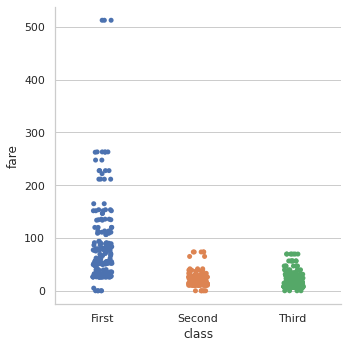

In [354]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare"
            );

Looks like a few people paid a lot more than everyone else in first class!

#### 1.1.2.&nbsp; `hue`
We can also divide our data by colour using the `hue` parameter. 

Now we can see the same data as above, but divided by `sex`.

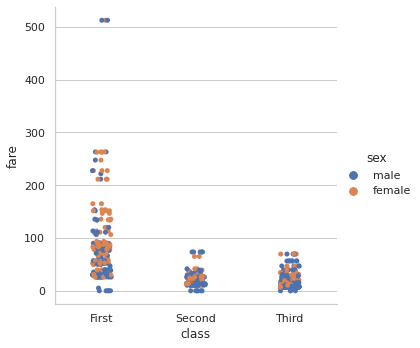

In [355]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare",
            hue="sex"
            );

> **Tip:** It only makes sense to use the `hue` parameter with a categorical feature that has a small number of categories, like `sex`. Try passing `fare` or `age` to the parameter and you'll see why...

#### 1.1.3.&nbsp; `col`
It is also possible to create multiple plots based on a category, which will share a y-axis - we simply place this category in the `col` parameter. 

Below we can see how much people paid, the class they travelled in, their sex, and in which port they boarded the boat.

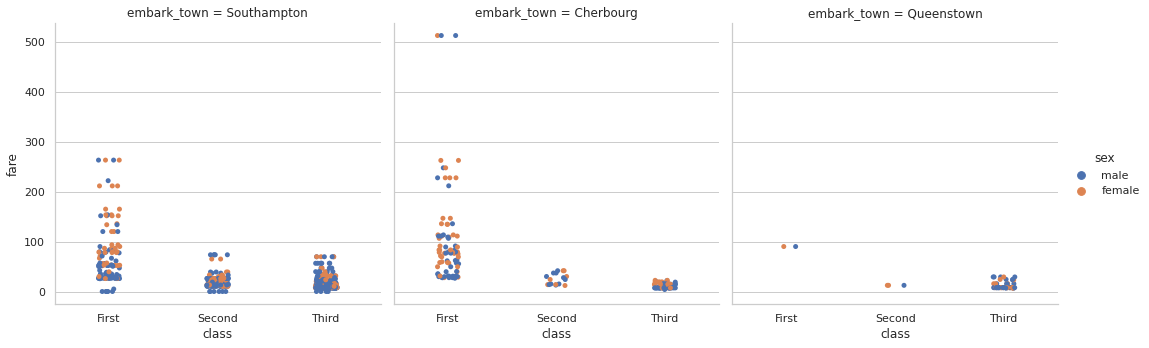

In [356]:
sns.catplot(data=titanic, 
            x="class", 
            y="fare", 
            hue="sex", 
            col="embark_town");

Interesting to see that almost everyone who boarded in [Queenstown](https://en.wikipedia.org/wiki/Cobh) had a third class ticket. Feel free to deliberate about the reasons why later.

> **Tip:** Complex plots that combine many variables together are a good exploratory tool. They allow Data Analysts to uncover hidden insights. However, these plots are generally terrible for presentations where the audience does not have a lot of time to analyse the plot. In presentations, always use only simple plots conveying a clear message. If a complex plot is needed, either send it beforehand to the audience or take the time to explain it during the presentation.

##### `col_wrap`
Sometimes, if the feature you selected for `col` has many categories it may struggle to be legible on the screen, such as the example below.

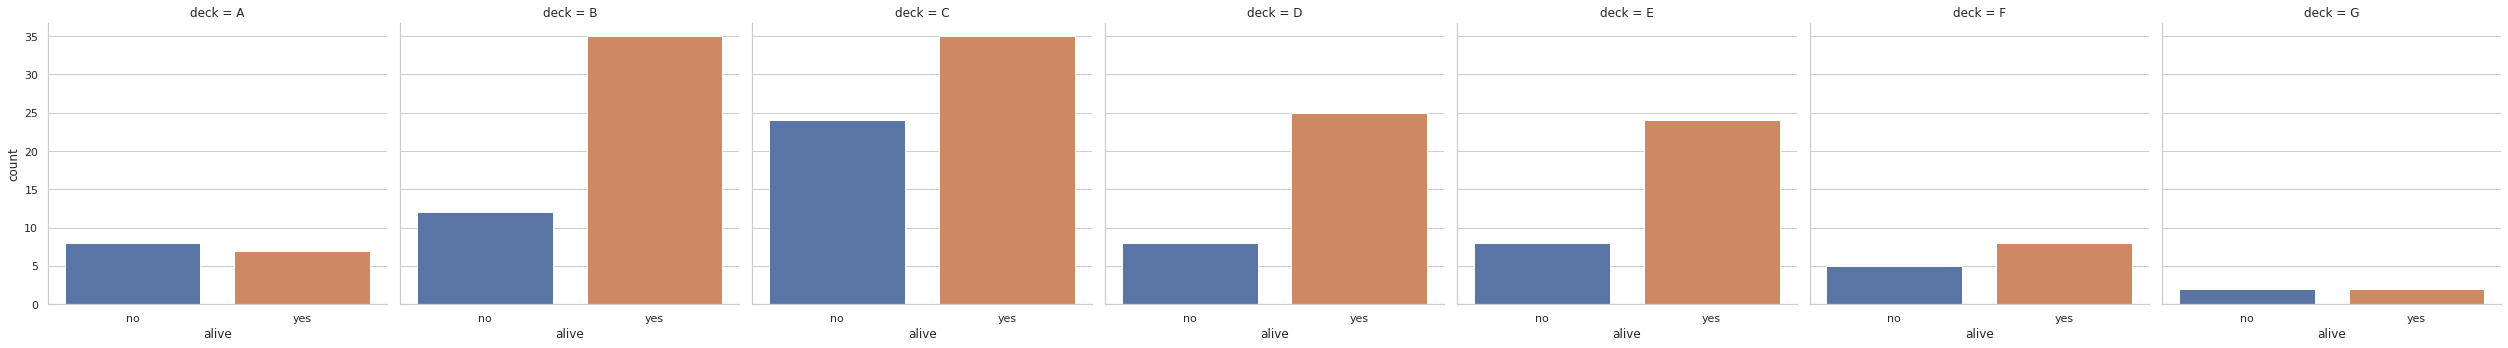

In [357]:
sns.catplot(data=titanic, 
            x="alive", 
            col="deck", 
            kind="count");

It is possible to spread out the columns over multiple lines using the parameter `col_wrap`

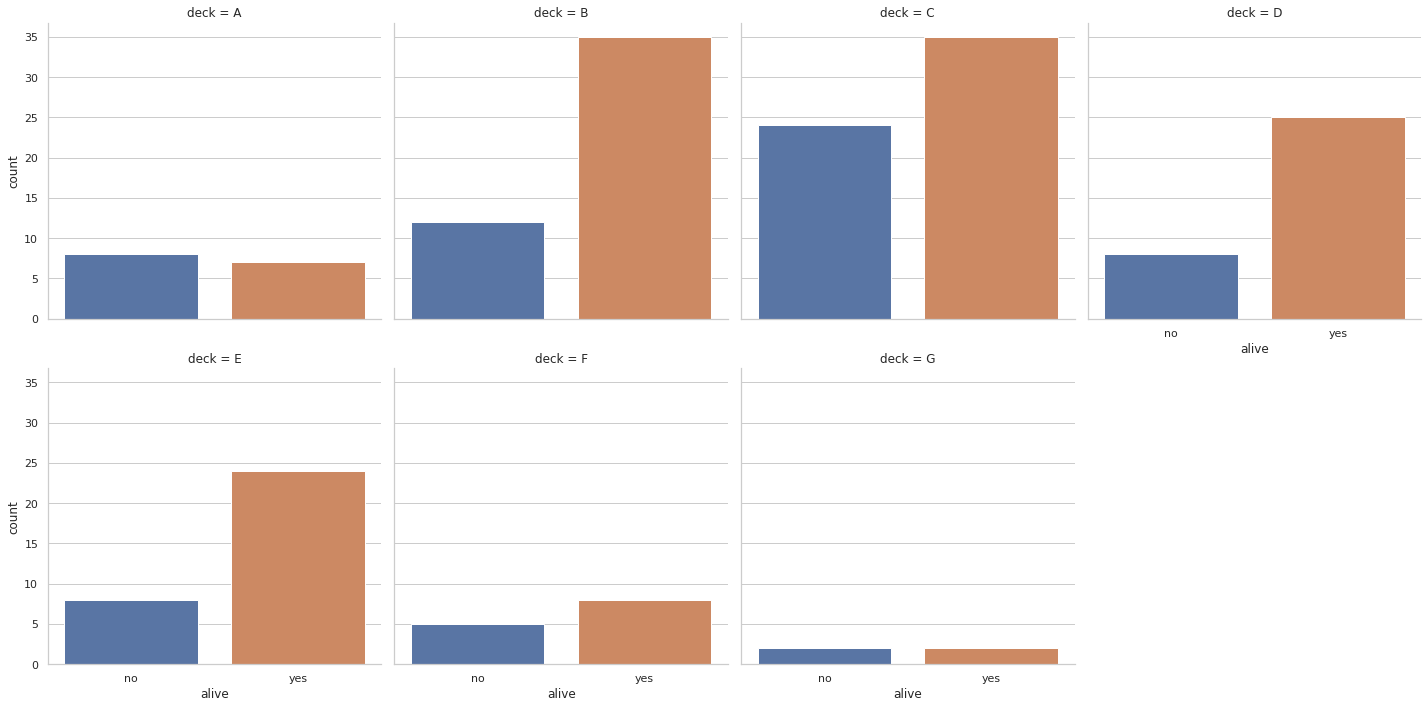

In [358]:
sns.catplot(data=titanic, 
            x="alive", 
            col="deck", 
            col_wrap=4, 
            kind="count");

#### 1.1.3.&nbsp; `row`
You can also split the categories vertically using the `row` parameter.

Here, we've used a `.displot()`, we'll go through those later in the notebook

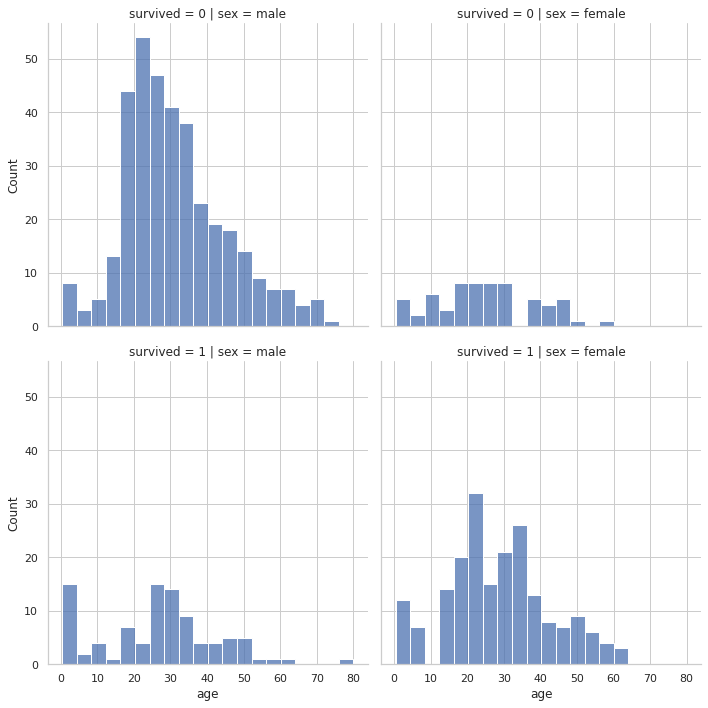

In [359]:
sns.displot(data=titanic, 
            x="age", 
            col="sex", 
            row="survived");

### 1.2.&nbsp; Selecting the type of plot
You may have noticed above that we also used the parameter `kind`, we can use this to change the type of categorical plot.

Categorical scatterplots:

* [.stripplot()](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) - `kind="strip"` the default

* [.swarmplot()](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) - `kind="swarm"`

Categorical distribution plots:

* [.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) - `kind="box"`

* [.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) - `kind="violin"`

* [.boxenplot()](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) - `kind="boxen"`

Categorical estimate plots:

* [.pointplot()](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) - `kind="point"`

* [.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot) - `kind="bar"`

* [.countplot()](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) - `kind="count"`

Each of these `kind`s have individual parameters that you can find on their documentation page.

#### 1.2.1.&nbsp; `kind = "bar"`
* The height of the bar is the arithmetic mean of the values.
* Black lines are the [confidence interval](https://www.khanacademy.org/math/ap-statistics/xfb5d8e68:inference-categorical-proportions/introduction-confidence-intervals/v/confidence-intervals-and-margin-of-error).
  * Can be controlled with the parameter `ci`:
    * `float`: size of confidence interval - default `95`
    * `"sd"`: draw standard deviation with black lines
    * `None`: don't draw black lines

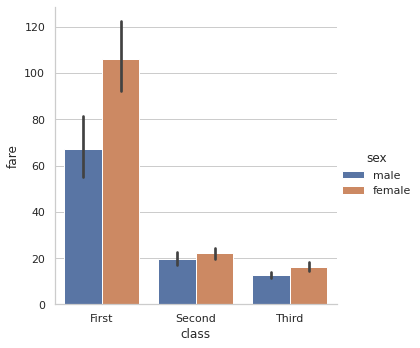

In [360]:
sns.catplot(kind="bar",
            data=titanic, 
            x="class", 
            y="fare", 
            hue="sex");

Why did women pay more on average?

#### 1.2.2.&nbsp; `kind = count`
A `count` plot shows the count of each category.

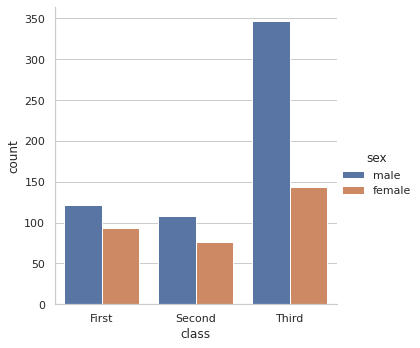

In [361]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex");

That's a big gender imbalance in third class!

### 1.3.&nbsp; Changing the size of a plot

#### 1.3.1.&nbsp; `height`
The official documentation says the `height` is the "Height (in inches) of each facet." Inches don't always translate on the screen, due to zoom, pixel density and other things, so take the interpretation of the number with a pinch of salt.

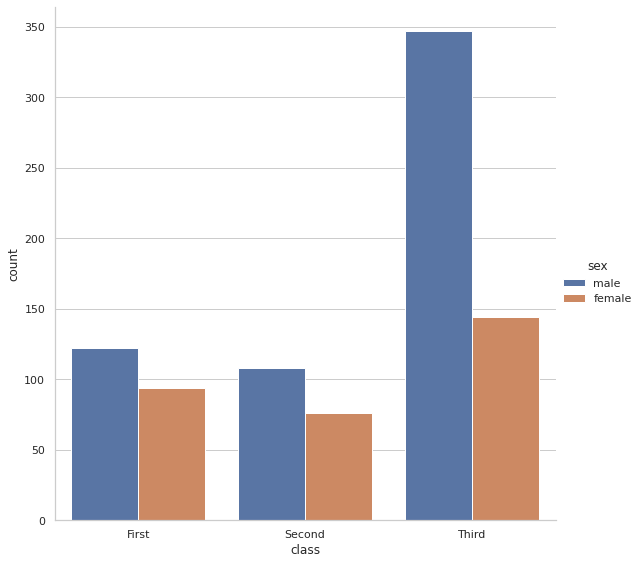

In [362]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex", 
            height=8);

#### 1.3.2.&nbsp; aspect
Officially aspect is the "ratio of each facet, so that aspect * height gives the width of each facet in inches." It's probably more easily undorstood as affecting the width of the plot.

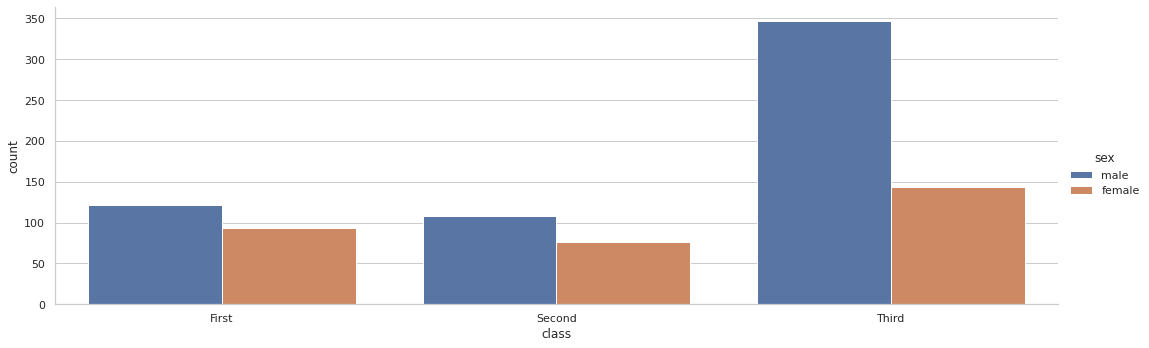

In [363]:
sns.catplot(kind="count", 
            data=titanic, 
            x="class", 
            hue="sex", 
            aspect=3);

Both `height` and `aspect` can be used together to control the overall size of a plot.

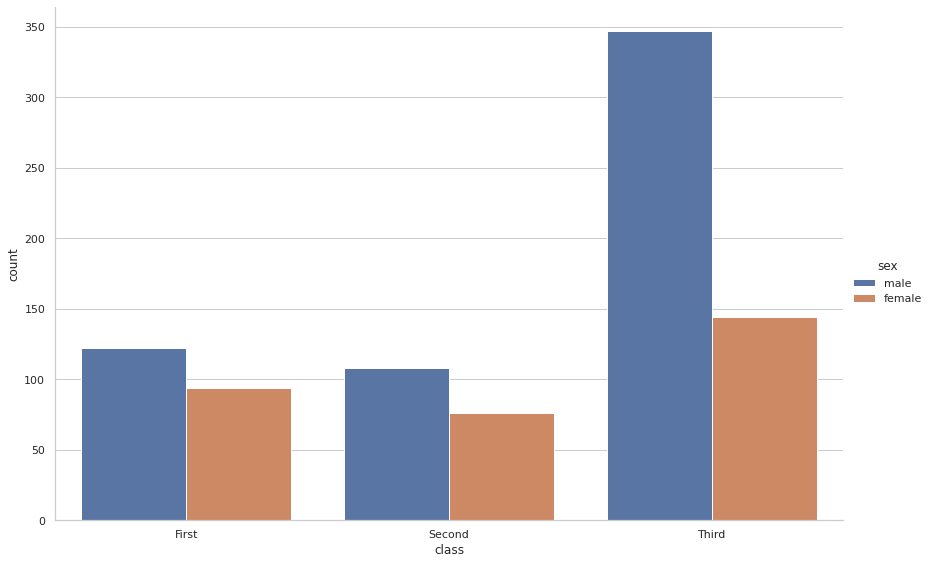

In [364]:
sns.catplot(kind="count",
            data=titanic, 
            x="class", 
            hue="sex",
            height=8, 
            aspect=1.5);

### 1.4.&nbsp; Changing the colour
[Colour documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)

#### 1.4.1.&nbsp; `color`
With the `color` parameter we can choose a specific colour for the plot. Obviously, you should not use this parameter if you are already using `hue` to define the colour of the plot based on a variable.

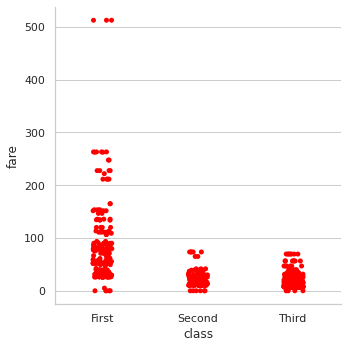

In [365]:
sns.catplot(data=titanic,
            x="class", 
            y="fare", 
            color="red");

#### 1.4.2. `palette`
With `palette` we can choose a range of colours for the plot. In this case, you can use a palette together with `hue` to define which colors will be taken by each category. 

Seaborn is know for it's great colours, please explore the documentation and experiment.

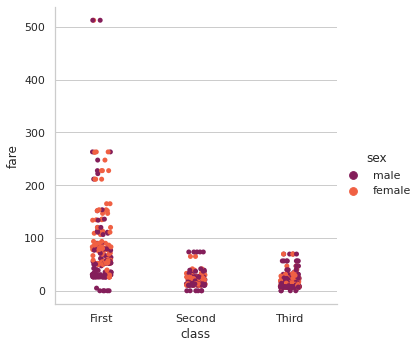

In [366]:
sns.catplot(data=titanic,
            x="class", 
            y="fare", 
            hue="sex",
            palette="rocket");

> **Tip:** Making a plot _exactly_ how you want it to be can be very challenging, and you are just at the start of your journey. For now, embrace default options, prioritize simplicity and take it one step at a time. In some cases, expressing the message that the plot conveys in a simple sentence is as useful or more as the plot itself!

# Challenge 1:
Make a plot that shows the number of passengers who survived and the number who died. Divide this data by sex and class. Feel free to play around with other parameters such as height and palette too.

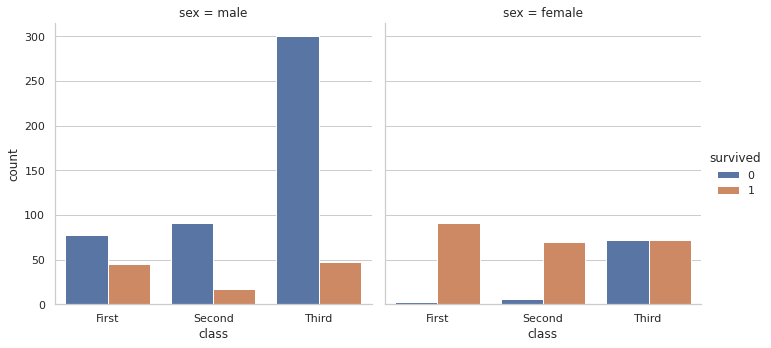

In [367]:
sns.catplot(data=titanic, 
            x="class", 
            col="sex", 
            hue='survived', 
            kind="count",
            palette="deep");

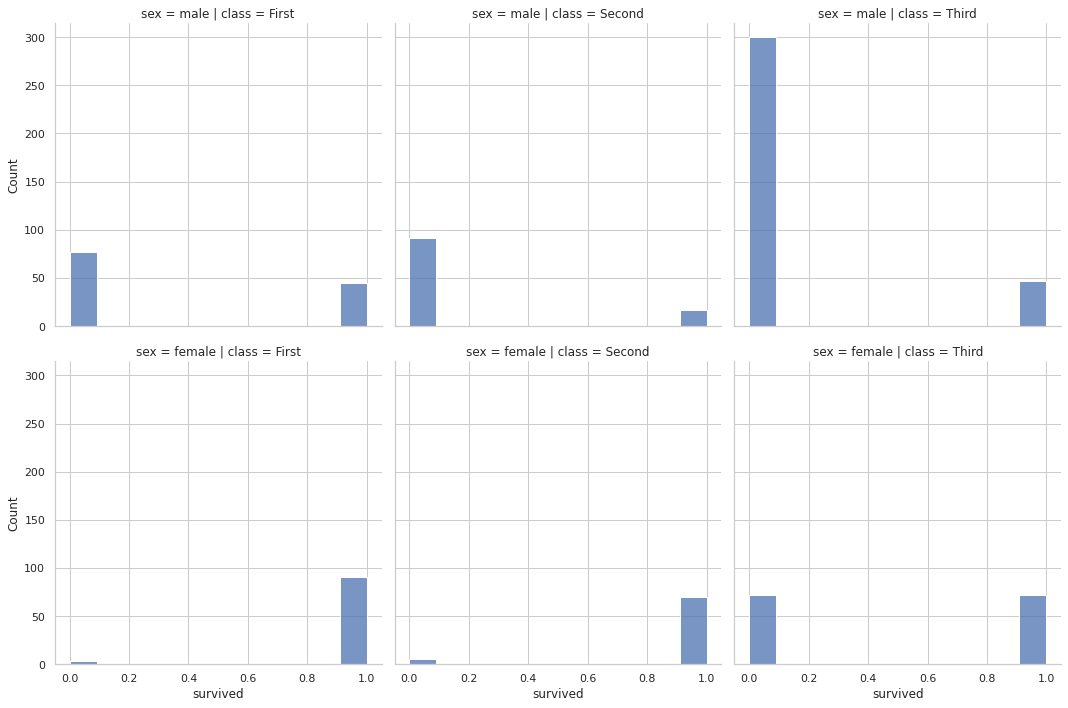

In [368]:
sns.displot(data=titanic, 
            x="survived", 
            col="class", 
            row="sex");

## 2.&nbsp; Distributions: `.displot()`
[.displot() docs](https://seaborn.pydata.org/generated/seaborn.displot.html)


[Seaborn tutorial for plotting distributions](https://seaborn.pydata.org/tutorial/distributions.html)

`kind`s of `.displot()`:
* [.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) - `kind="hist"` the default
* [.kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) - `kind="kde"`
* [.ecdfplot()](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) - `kind="ecdf"`

### 2.1.&nbsp; Universal parameters
Just like above, we can use `x`, `hue`, `col`, `color`, etc... The main difference you'll find here, is that in some `.catplot()`s you used 2 features `x` and `y`, distributions look at only one feature, so we won't be using the `y` parameter much.

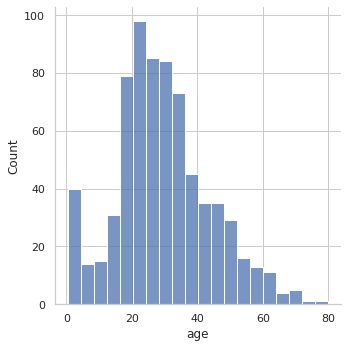

In [369]:
sns.displot(data=titanic, 
            x="age");

We may not be using `y` for histograms, but we can still utilise `hue` and `col` to gain insights.

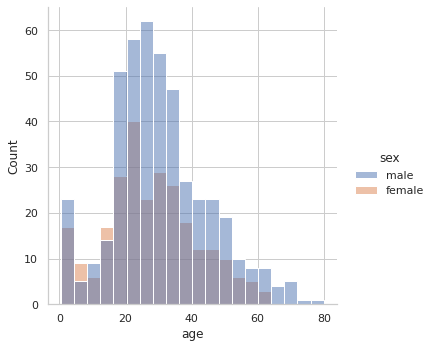

In [370]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex");

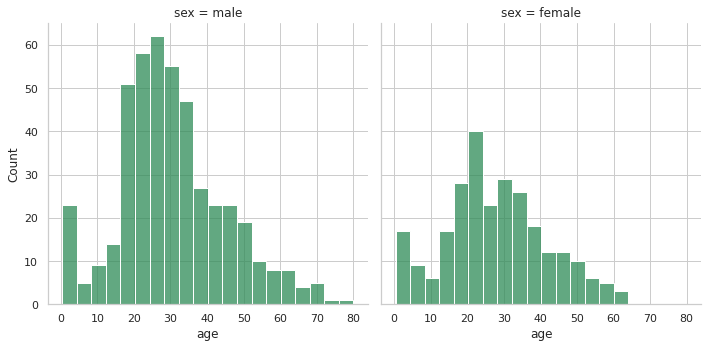

In [371]:
sns.displot(data=titanic, 
            x="age", 
            col="sex", 
            color="seagreen");

### 2.2.&nbsp; Parameters unique to histograms
We use histograms a lot to get an idea of how our data is distributed, so let's look quickly how we can improve on the basic plot.

#### 2.2.1.&nbsp; Changing the aggregate

##### `stat`
`stat` is an aggregate to compute each bin:
* `count`: show the number of observations in each bin
* `frequency`: show the number of observations divided by the bin width
* `probability`: or proportion: normalize such that bar heights sum to 1
* `percent`: normalize such that bar heights sum to 100
* `density`: normalize such that the total area of the histogram equals 1

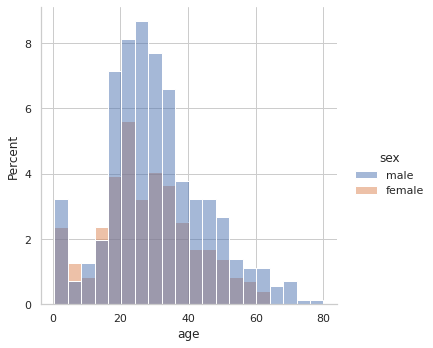

In [372]:
sns.displot(data=titanic,
            x="age", 
            hue="sex",
            stat="percent");

#### 2.2.2.&nbsp; Changing the granularity

##### `bins` or `binwidth`

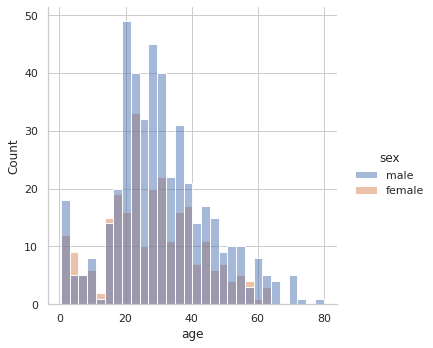

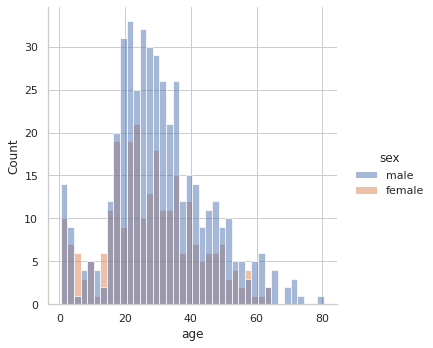

In [373]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            bins=30),
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            binwidth=2);

The higher the number of `bins`, or smaller the `binwidth` the greater the granularity.

#### 2.2.3.&nbsp; Tracing the trend
We can also trace a smooth curve along the histogram using the `kde` parameter. If you're unsure what `kde` is, take a look in the next section `kde` is also a standalone plot from `.displot()`

##### The `kde` parameter:

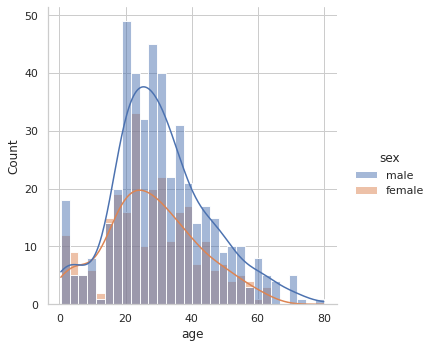

In [374]:
sns.displot(data=titanic, 
            x="age", 
            hue="sex", 
            bins=30, 
            kde=True);

### 2.3.&nbsp; `kde` plots
Seaborn explains a `kde` plot very well: 

> "A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. [...] Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth."



Essentially, it's another way of viewing the same information as a histogram. They both have their (de)merits.


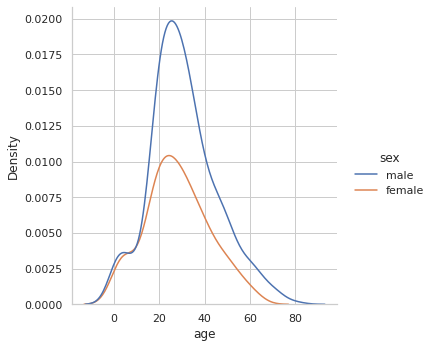

In [375]:
sns.displot(kind="kde",
            data=titanic, 
            x="age",
            hue="sex");

## 3.&nbsp; Relational data: `.relplot()`
https://seaborn.pydata.org/generated/seaborn.relplot.html

https://seaborn.pydata.org/tutorial/relational.html

[.relplot() docs](https://seaborn.pydata.org/generated/seaborn.relplot.html)


[Seaborn tutorial for plotting statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)

`kind`s of `.relplot()`
* [.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) - `kind="scatter"` the default
* [.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) - `kind="line"`

### 3.1.&nbsp; Universal parameters
As relational plots are comparing the relationship between features, here, unlike a distribution plot, we will generally always have an `x` and a `y`.

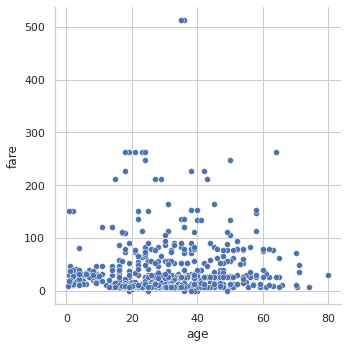

In [376]:
sns.relplot(data=titanic,
            x="age", 
            y="fare");

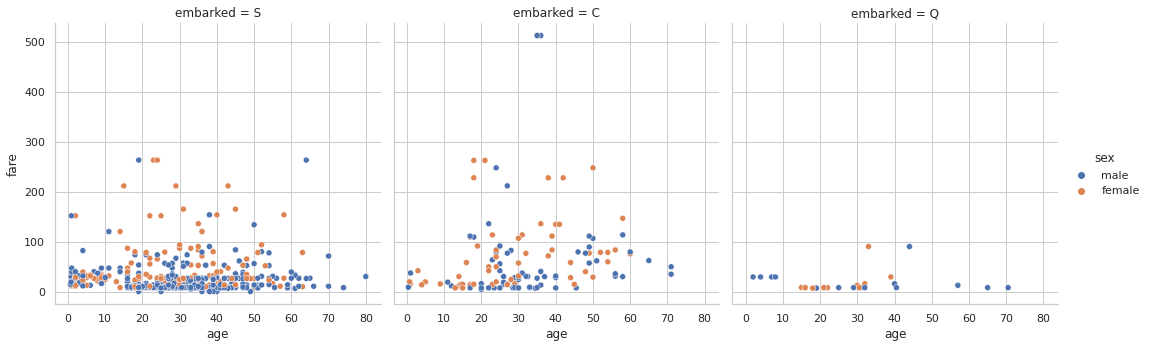

In [377]:
sns.relplot(data=titanic, 
            x="age", 
            y="fare", 
            hue="sex", 
            col="embarked");

### 3.2.&nbsp; Specific to scatter

#### 3.2.1.&nbsp; Changing the shape of the marker

##### `style`

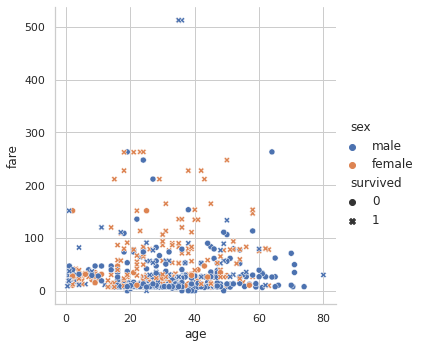

In [378]:
sns.relplot(data=titanic, 
            x="age", 
            y="fare", 
            hue="sex", 
            style="survived");

# Loading Eniac

In [379]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Challenges:
Let's start combining some of the skills we've learnt with `.groupby()`, `datetime`, and `seaborn` (no pandas plotting this time, please use seaborn). 

Sometimes you may have to make a smaller DataFrame to help Seaborn. Here's a quick example of one way to plot the top 10 brands based on the amount of products sold.

In [380]:
ol_df = orderlines_qu.copy()

In [381]:
ol_df["short"] = ol_df["sku"].str[:3]

In [382]:
ol_with_brands_df = ol_df.merge(brands, 
                                how="left", 
                                left_on="short", 
                                right_on="short")
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [383]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


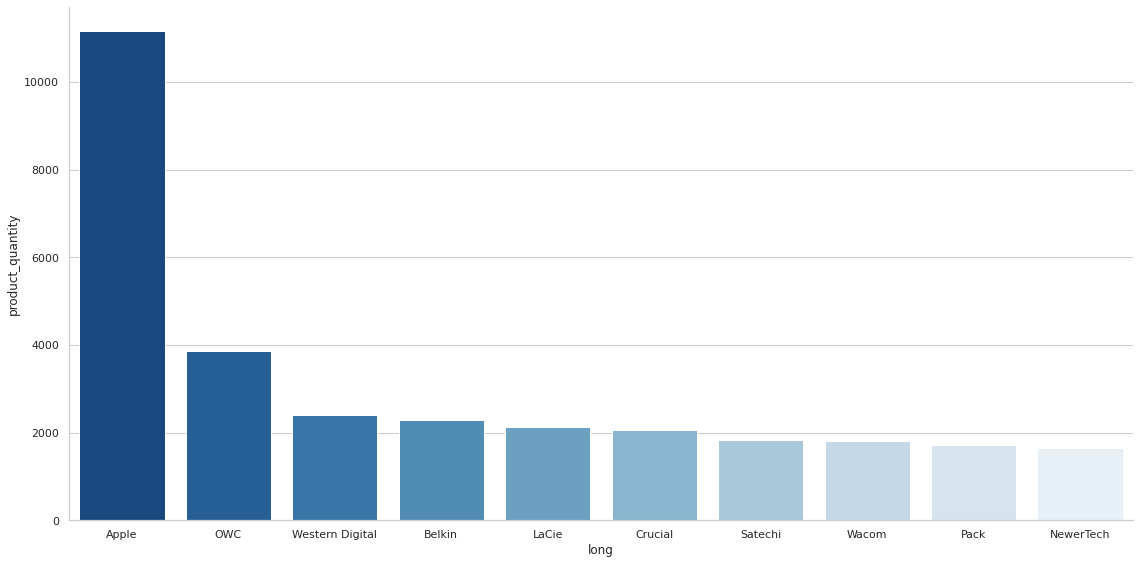

In [384]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

## Challenge 2:
Create a scatter plot to explore the relationship between the recommended price for a product (`products.price`) and the price that products actually sold for (`orderlines.unit_price`)

**Hint:** You don't need to groupby here. Just bring a couple of tables together and then use seaborn.

In [397]:
products = products_cl.copy()
orderlines = orderlines_qu.copy()

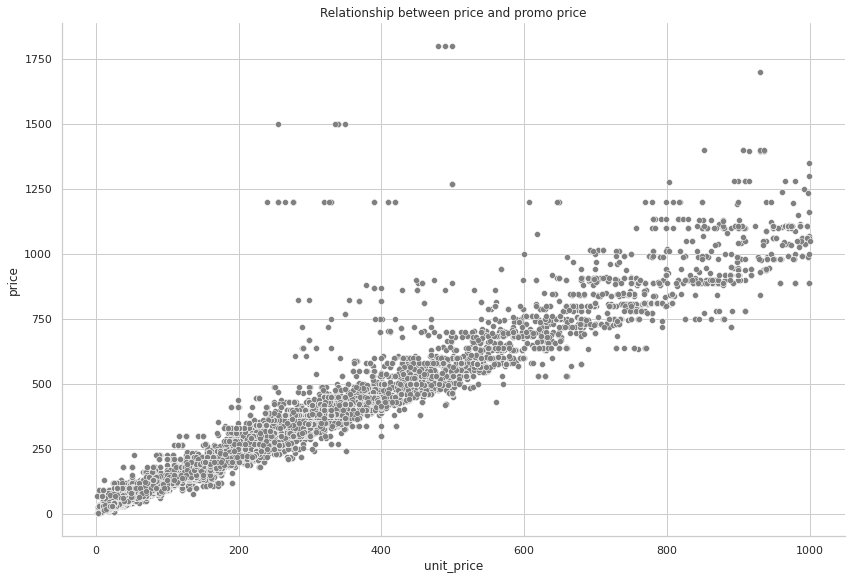

In [398]:
merged_df = products.merge(orderlines, how = 'left', on = 'sku')
sns.relplot(data=merged_df,
            x="unit_price", 
            y="price",
            height = 8, 
            aspect = 1.5,
            color = "grey").set(title = "Relationship between price and promo price");

## Challenge 3:
Let's investigate when customers like to spend more money. Display the average daily price of an order on a line plot.

**Hint:** first work on finding the daily average of `total_paid`, make sure you have this saved as a DataFrame, then work on your plot using this DataFrame.

Text(0.5, 1.0, 'Daily average price of orders')

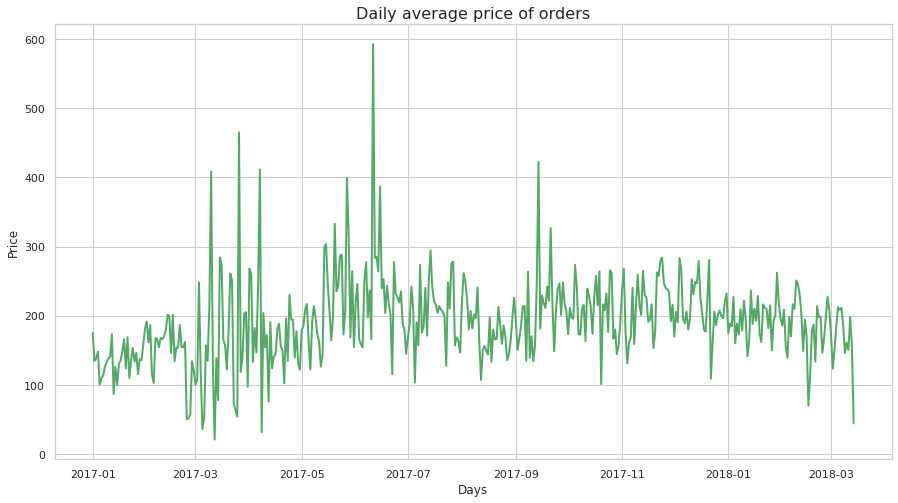

In [433]:
orders = orders_qu.copy()
orders["created_date"] = pd.to_datetime(orders["created_date"])

daily_average = orders.resample("D", on="created_date").mean()["total_paid"]
daily_average = daily_average.to_frame().reset_index()
plot = sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.set(style="whitegrid")
plot = sns.lineplot(data=daily_average, x = "created_date", y = "total_paid", color = "g", lw=2)
plot.set_xlabel("Days", fontsize = 12)
plot.set_ylabel("Price", fontsize = 12)
plot.set_title("Daily average price of orders", fontsize = 16)

## Challenge 4:
Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

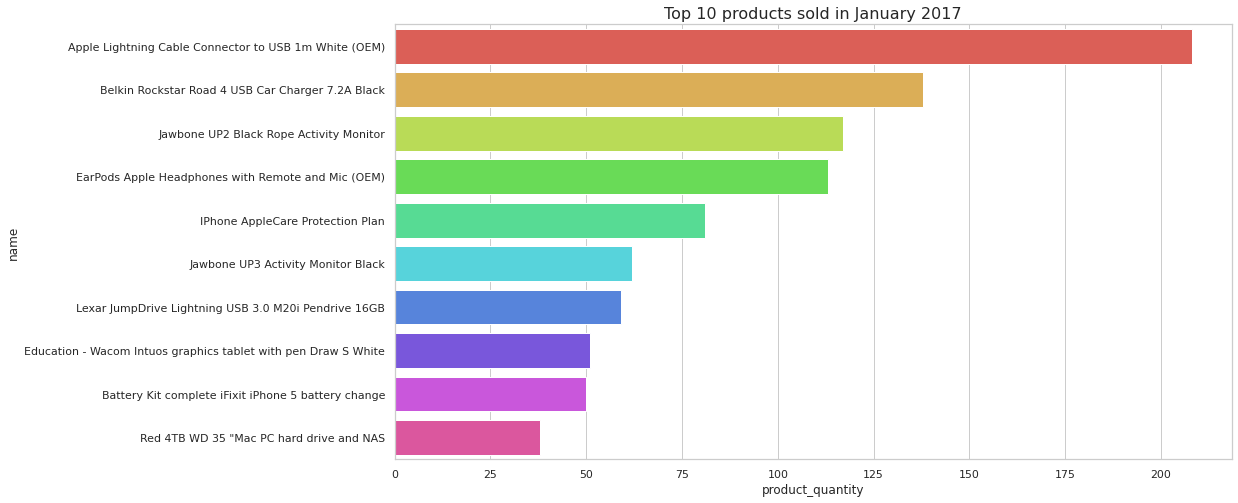

In [434]:
# changing the data type
merged_df["date"] = pd.to_datetime(merged_df["date"])
# filtering 
products_January_2017 = merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2017-01")]
# selecting top 10 products sold in January 2017
products_January_2017 = products_January_2017.groupby("name")["product_quantity"].sum().nlargest(10)
# converting that to df
products_January_2017 = products_January_2017.to_frame().reset_index()

sns.barplot(x = 'product_quantity',
            y = 'name',
            data = products_January_2017,
            orient = "h",
            palette = 'hls',
            capsize = 0.05,             
            saturation = 4).set_title("Top 10 products sold in January 2017", fontsize = 16);

Text(0.5, 1.0, 'Top 10 products sold in January 2018')

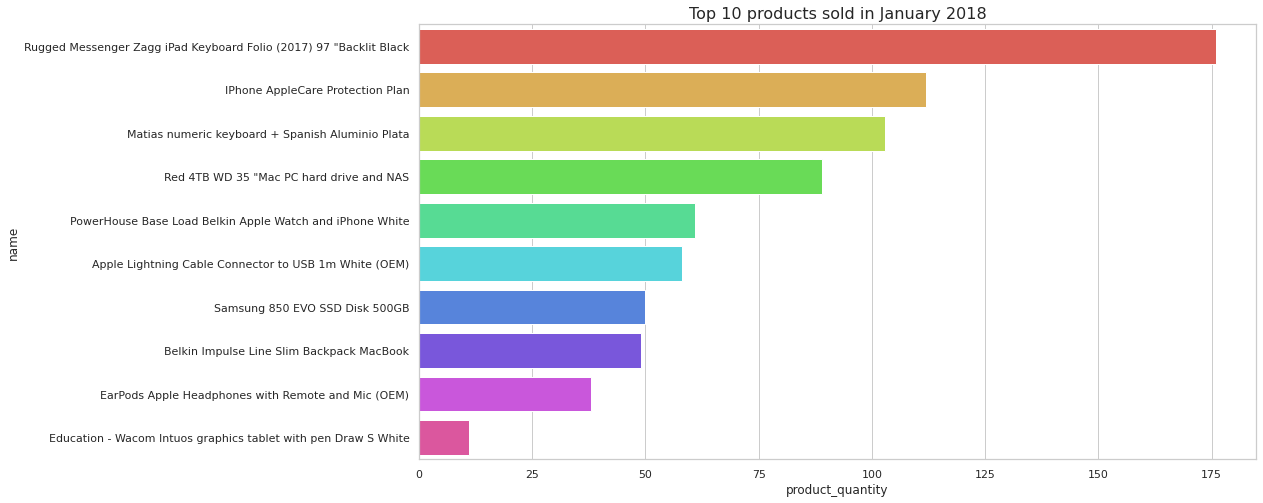

In [435]:
products_January_2018 = merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2018-01")]
products_January_2018 = products_January_2018.groupby("name")["product_quantity"].sum().nlargest(10)
products_January_2018 = products_January_2018.to_frame().reset_index()

sns.barplot(x = 'product_quantity', 
            y = 'name',
            data = products_January_2018,
            orient = "h",
            palette = 'hls',
            capsize = 0.05,             
            saturation = 4).set_title("Top 10 products sold in January 2018", fontsize = 16)

## Bonus challenge:
This challenge is an extra. We will not go through the solution in class. It's here for those of you who finish early or are inquisitive.

Find the top 10 brands that have generated the most revenue in the snapshot we have. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [401]:
# adding brands on merged df
merged_df['short'] = merged_df['sku'].str.slice(0, 3)
merged_df = merged_df.merge(brands, on = 'short')
# making a new df that has only 20 top products from previous task
df = pd.concat([products_January_2017, products_January_2018], ignore_index=True)
# calculating revenue
merged_df['revenue'] = merged_df.unit_price * merged_df.product_quantity
# filtering through df and leaving only top 20 products from previous task
merged_df = merged_df.loc[merged_df.name.isin(df.name),:]
# getting brand names from those 20 products and selecting 10 with highest revenue
top_brands = merged_df.groupby("long")["revenue"].sum().nlargest(10)
# converting to list
top_brands = top_brands.to_frame().reset_index()
top_brands = top_brands['long'].tolist()

In [402]:
# again filtering through df and leaving only top 10 brands
merged_df = merged_df.loc[merged_df.long.isin(top_brands),:]
merged_df

,sku,name,desc,price,in_stock,type,id,id_order,product_id,product_quantity,unit_price,date,short,long,revenue
1243,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,1119728.0,299850.0,0.0,2.0,14.99,2017-01-01 18:25:21,APP,Apple,29.98
1244,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,1120674.0,300309.0,0.0,1.0,14.99,2017-01-02 09:54:57,APP,Apple,14.99
1245,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,1121513.0,300626.0,0.0,1.0,14.99,2017-01-02 15:10:08,APP,Apple,14.99
1246,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,1123020.0,301327.0,0.0,1.0,14.99,2017-01-03 09:40:48,APP,Apple,14.99
1247,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,1123425.0,301512.0,0.0,1.0,14.99,2017-01-03 12:30:09,APP,Apple,14.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56612,MAT0010,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401,1648042.0,526326.0,0.0,3.0,69.99,2018-03-13 10:47:38,MAT,Matias,209.97
56613,MAT0010,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401,1648247.0,526413.0,0.0,1.0,69.99,2018-03-13 12:55:22,MAT,Matias,69.99
56614,MAT0010,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401,1648499.0,526537.0,0.0,1.0,69.99,2018-03-13 17:02:02,MAT,Matias,69.99
56615,MAT0010,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401,1648664.0,526615.0,0.0,1.0,69.99,2018-03-13 19:30:16,MAT,Matias,69.99


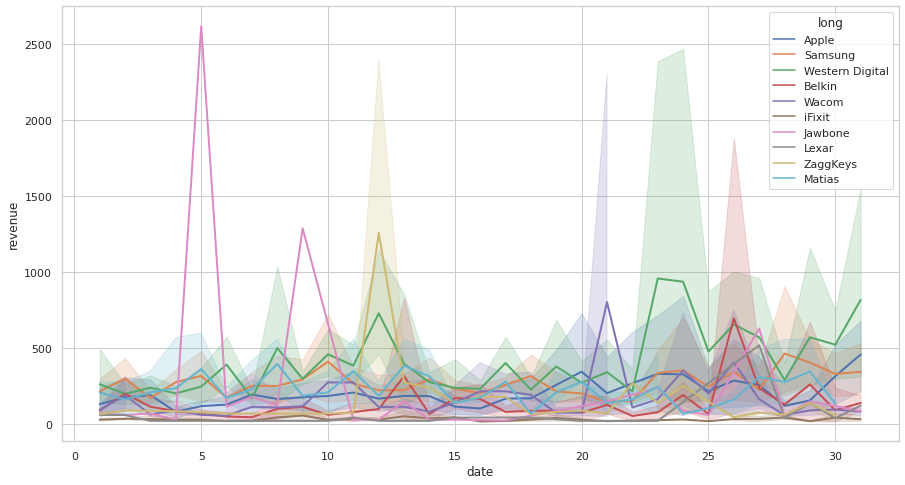

In [432]:
daily = merged_df.groupby([merged_df.date.dt.year,merged_df.date.dt.month,merged_df.date.dt.day,merged_df.long])["revenue"].agg('sum')
daily = daily.to_frame()
plt = sns.set(rc = {'figure.figsize':(15,8)})
plt = sns.set(style="whitegrid")
plt = sns.lineplot(data=daily, x = "date", y = "revenue", hue = "long", color = "g", lw=2)
plt